In [26]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
from os.path import join
import collections
import re
import csv
from collections import defaultdict
from collections import Counter

#%matplotlib inline

In [27]:
df = pd.read_csv('Reviews.csv', sep=',', error_bad_lines=False, index_col=False)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [28]:
df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'Time', 'HelpfulnessDenominator', 'HelpfulnessNumerator'], axis = 1, inplace = True)
df.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


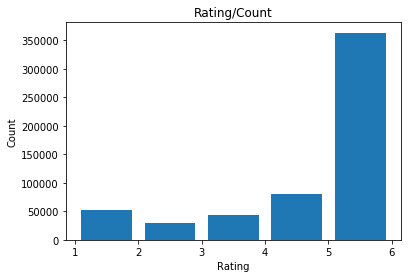

In [29]:
x = df['Score']

bins=[1, 2, 3, 4, 5, 6]

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Rating/Count')
plt.hist(x, bins, histtype='bar', rwidth=0.8)

plt.show()




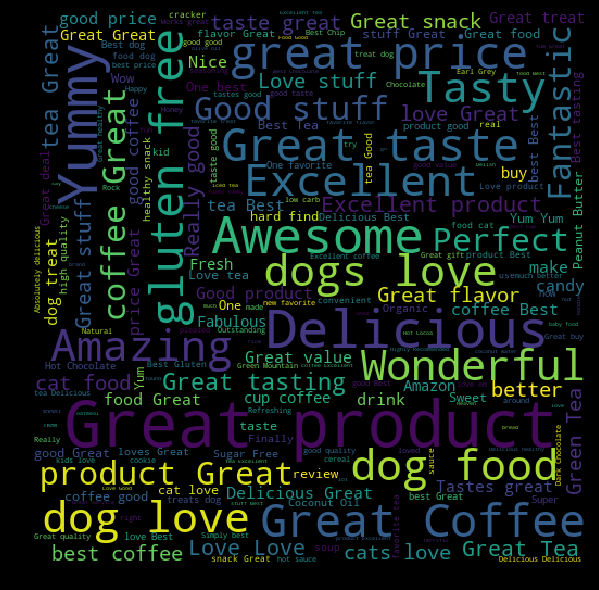

In [30]:
posWords = ' '.join(list(df[df['Score'] == 5]['Summary']))
pos_wc = WordCloud(width = 512,height = 512).generate(posWords)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(pos_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


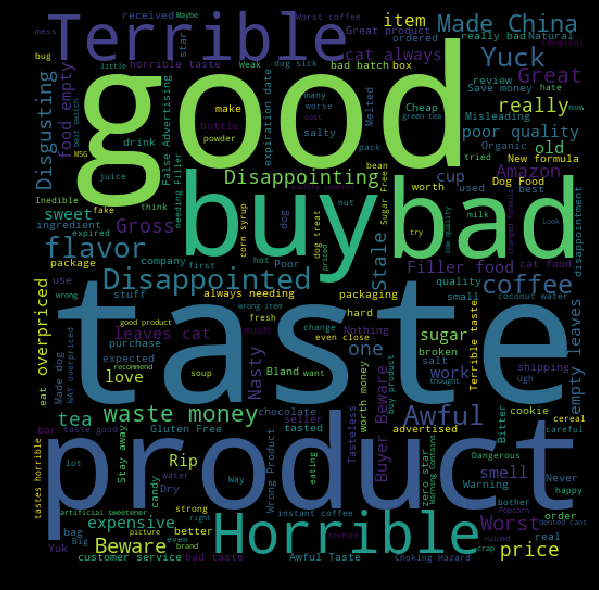

In [31]:
negWords = ' '.join(list(df[df['Score'] == 1]['Summary']))
neg_wc = WordCloud(width = 512,height = 512).generate(negWords)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(neg_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [32]:
count_row = df.shape[0] #row count df.shape
print(count_row)

568454


In [33]:
odf = df
odf.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


In [34]:
odf['Score'] = df[df['Score'] != 3].replace({1:0, 2:0, 4:1, 5:1})
odf.head()

,Score,Summary,Text
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,"""Delight"" says it all",This is a confection that has been around a fe...
3,0,Cough Medicine,If you are looking for the secret ingredient i...
4,1,Great taffy,Great taffy at a great price. There was a wid...


In [35]:
odf['Text Word Count'] = df['Text'].str.count(' ')+1
odf['Summary ! Count'] = df['Summary'].str.count('!')

odf.head()

,Score,Summary,Text,Text Word Count,Summary ! Count
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,0.0
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,0.0
2,1,"""Delight"" says it all",This is a confection that has been around a fe...,99,0.0
3,0,Cough Medicine,If you are looking for the secret ingredient i...,43,0.0
4,1,Great taffy,Great taffy at a great price. There was a wid...,30,0.0


In [36]:
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'hers', 'did', 'again', 'such', 've', 'on', "isn't", 'ours', 'ain', 'between', 'our', 'should', 'where', 'as', 'couldn', 'why', 'was', 'herself', 'too', 'hasn', "shan't", "that'll", 'i', 'haven', 'aren', 'but', 'now', 'yourselves', 'some', 'wasn', "you've", 'yours', 'himself', 'any', 's', 'those', 'an', 'no', "should've", "it's", 'if', 'or', 'ma', 'a', "you're", "didn't", 're', 'my', 'that', 'until', 'being', 'other', 'mustn', 'its', 'doing', 'during', 'don', 'has', 'same', 'these', "she's", 'have', 'her', 'very', "couldn't", 'this', 'by', 'it', 'once', 'the', 'out', 'only', 'more', 'above', 'ourselves', 'all', 'didn', 'than', 'will', 'is', 'with', 'weren', 'doesn', 'll', 'of', 'him', 'isn', 'both', 'he', "mightn't", 'own', 'against', 'itself', 'for', "shouldn't", 'myself', 'had', 'from', 'mightn', 'below', 'your', "wouldn't", 'am', 'shouldn', "don't", 'through', 'his', 'here', 'and', 'we', 'while', 'won', 'can', 'themselves', 'few', 'so', 'them', 'when', 'which', 'further', 'after', 

In [37]:
#Counter(" ".join(df["Summary"])).split()).most_common(5)

In [38]:
#pd.Series(' '.join(df['Summary'].str).split()).value_counts()[:5]

In [39]:
words = (df.Summary
           .str.lower()
           .str.cat(sep=' ')
           .split()
)
words

['good',
 'quality',
 'dog',
 'food',
 'not',
 'as',
 'advertised',
 '"delight"',
 'says',
 'it',
 'all',
 'cough',
 'medicine',
 'great',
 'taffy',
 'nice',
 'taffy',
 'great!',
 'just',
 'as',
 'good',
 'as',
 'the',
 'expensive',
 'brands!',
 'wonderful,',
 'tasty',
 'taffy',
 'yay',
 'barley',
 'healthy',
 'dog',
 'food',
 'the',
 'best',
 'hot',
 'sauce',
 'in',
 'the',
 'world',
 'my',
 'cats',
 'love',
 'this',
 '"diet"',
 'food',
 'better',
 'than',
 'their',
 'regular',
 'food',
 'my',
 'cats',
 'are',
 'not',
 'fans',
 'of',
 'the',
 'new',
 'food',
 'fresh',
 'and',
 'greasy!',
 'strawberry',
 'twizzlers',
 '-',
 'yummy',
 'lots',
 'of',
 'twizzlers,',
 'just',
 'what',
 'you',
 'expect.',
 'poor',
 'taste',
 'love',
 'it!',
 'great',
 'sweet',
 'candy!',
 'home',
 'delivered',
 'twizlers',
 'always',
 'fresh',
 'twizzlers',
 'delicious',
 'product!',
 'twizzlers',
 'please',
 'sell',
 'these',
 'in',
 'mexico!!',
 'twizzlers',
 '-',
 'strawberry',
 'nasty',
 'no',
 'flavor'

In [40]:
#def most_common(words):
#    return max(set(words), key=lst.count)
#print(words)

In [41]:
#df['Summary'].str.split()
#' '.join(df['Summary'].str.split().values)
#sentences = df['Summary'].str.split().values
#print(sentences.shape)
#sentences.reshape(1, -1)

In [42]:
odf['Great'] = odf["Summary"].str.contains("great", case=False, na=False).astype(int)
odf['Awesome'] = odf["Summary"].str.contains("awesome", case=False, na=False).astype(int)
odf['Excellent'] = odf["Summary"].str.contains("excellent", case=False, na=False).astype(int)
odf['Delicious'] = odf["Summary"].str.contains("delicious", case=False, na=False).astype(int)
odf['Yummy'] = odf["Summary"].str.contains("yummy", case=False, na=False).astype(int)

#df['Great'] = [1 if 'great' in s.lower() else 0 for s in df['Summary']]
#df['Great'] = df['Summary'].apply(lambda x: 'great' in x.lower())
#df["Great"] = np.where(df["Summary"].str.lower().contains("great", na=False), '1', '0')
#if df["Summary"].str.lower().str.contains("great", na=False) == True:
odf.head()

,Score,Summary,Text,Text Word Count,Summary ! Count,Great,Awesome,Excellent,Delicious,Yummy
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,0.0,0,0,0,0,0
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,0.0,0,0,0,0,0
2,1,"""Delight"" says it all",This is a confection that has been around a fe...,99,0.0,0,0,0,0,0
3,0,Cough Medicine,If you are looking for the secret ingredient i...,43,0.0,0,0,0,0,0
4,1,Great taffy,Great taffy at a great price. There was a wid...,30,0.0,1,0,0,0,0


In [43]:
odf['Overall Positive Point'] = odf['Great'] + odf['Awesome'] + odf['Excellent'] + odf['Delicious'] + odf['Yummy'] + odf['Summary ! Count']
odf.head()

,Score,Summary,Text,Text Word Count,Summary ! Count,Great,Awesome,Excellent,Delicious,Yummy,Overall Positive Point
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,0.0,0,0,0,0,0,0.0
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,0.0,0,0,0,0,0,0.0
2,1,"""Delight"" says it all",This is a confection that has been around a fe...,99,0.0,0,0,0,0,0,0.0
3,0,Cough Medicine,If you are looking for the secret ingredient i...,43,0.0,0,0,0,0,0,0.0
4,1,Great taffy,Great taffy at a great price. There was a wid...,30,0.0,1,0,0,0,0,1.0


In [44]:
odf['Terrible'] = odf["Summary"].str.contains("terrible", case=False, na=False).astype(int)
odf['Bad'] = odf["Summary"].str.contains("bad", case=False, na=False).astype(int)
odf['Product'] = odf["Summary"].str.contains("product", case=False, na=False).astype(int)
odf['Horrible'] = odf["Summary"].str.contains("horrible", case=False, na=False).astype(int)
odf['Disappointed'] = odf["Summary"].str.contains("disappointed", case=False, na=False).astype(int)
odf['Good'] = odf["Summary"].str.contains("good", case=False, na=False).astype(int)

In [45]:
odf['Overall Negative Point'] = odf['Terrible'] + odf['Bad'] + odf['Product'] + odf['Horrible'] + odf['Disappointed']
odf.head()

,Score,Summary,Text,Text Word Count,Summary ! Count,Great,Awesome,Excellent,Delicious,Yummy,Overall Positive Point,Terrible,Bad,Product,Horrible,Disappointed,Good,Overall Negative Point
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,0.0,0,0,0,0,0,0.0,0,0,0,0,0,1,0
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0
2,1,"""Delight"" says it all",This is a confection that has been around a fe...,99,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0
3,0,Cough Medicine,If you are looking for the secret ingredient i...,43,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0
4,1,Great taffy,Great taffy at a great price. There was a wid...,30,0.0,1,0,0,0,0,1.0,0,0,0,0,0,0,0


In [46]:
ndm = odf

In [47]:
ndm.drop(['Terrible','Bad','Product','Horrible','Disappointed', 'Great', 'Awesome', 'Excellent', 'Delicious', 'Yummy', 'Summary ! Count'], axis = 1, inplace = True)


In [48]:
ndm

,Score,Summary,Text,Text Word Count,Overall Positive Point,Good,Overall Negative Point
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,0.0,1,0
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,0.0,0,0
2,1,"""Delight"" says it all",This is a confection that has been around a fe...,99,0.0,0,0
3,0,Cough Medicine,If you are looking for the secret ingredient i...,43,0.0,0,0
4,1,Great taffy,Great taffy at a great price. There was a wid...,30,1.0,0,0
5,1,Nice Taffy,I got a wild hair for taffy and ordered this f...,72,0.0,0,0
6,1,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,53,3.0,1,0
7,1,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,28,0.0,0,0
8,1,Yay Barley,Right now I'm mostly just sprouting this so my...,26,0.0,0,0
9,1,Healthy Dog Food,This is a very healthy dog food. Good for thei...,25,0.0,0,0


In [20]:
#pd.Series(' '.join(str(df['Summary'])).lower().split()).value_counts()[:100]

In [49]:
# Then, we can divide decision label and features as;
X = ndm.drop('Score', axis=1) # these are features
y = ndm['Score']       

In [50]:
from sklearn.model_selection import train_test_split

# This will create us train and test datasets from the original dataset that we have where
# 70% of original dataframe will be train set and 30% of it will be test set to evaluate the Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

In [51]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [52]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Soooo good'

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Rating'],
    index=['Real rating'])